In [1]:
import os
from mdagent import MDAgent

In [2]:
prompt13 = "Simulate oxygenated hemoglobin (1A3N) and deoxygenated hemoglobin (6BB5). Then analyze the RDF of both."
llm_var = "claude-3-5-sonnet-20240620"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools, use_memory=False)
print(llm_var)

claude-3-5-sonnet-20240620


In [3]:
agent.run(prompt13)

Thought: To simulate oxygenated and deoxygenated hemoglobin and analyze their RDF, we need to follow several steps. Let's start by downloading the PDB files for both structures.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1A3N"
}
```PDB file found with this ID: 1A3N
Thought: Great, we've successfully downloaded the PDB file for oxygenated hemoglobin (1A3N). Now let's download the PDB file for deoxygenated hemoglobin (6BB5).

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "6BB5"
}
```PDB file found with this ID: 6BB5
Thought: Now that we have both PDB files downloaded, we need to set up and run simulations for both structures. Let's start with the oxygenated hemoglobin (1A3N).

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1A3N_010216",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",


({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
registry = agent.path_registry
print(os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_73
Files found in registry: 1A3N_010216: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_010216
 6BB5_010220: PDB file downloaded from RSCB
 PDBFile ID: 6BB5_010220
 1A3N_010320: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_010326: Initial positions for simulation sim0_010326
 sim0_010326: Basic Simulation of Protein 1A3N_010320
 rec0_010356: Simulation trajectory for protein 1A3N_010320 and simulation sim0_010326
 rec1_010356: Simulation state log for protein 1A3N_010320 and simulation sim0_010326
 rec2_010356: Simulation pdb frames for protein 1A3N_010320 and simulation sim0_010326
 6BB5_024354: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_024359: Initial positions for simulation sim0_024359
 sim0_024359: Basic Simu

In [5]:
import re
import os
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)

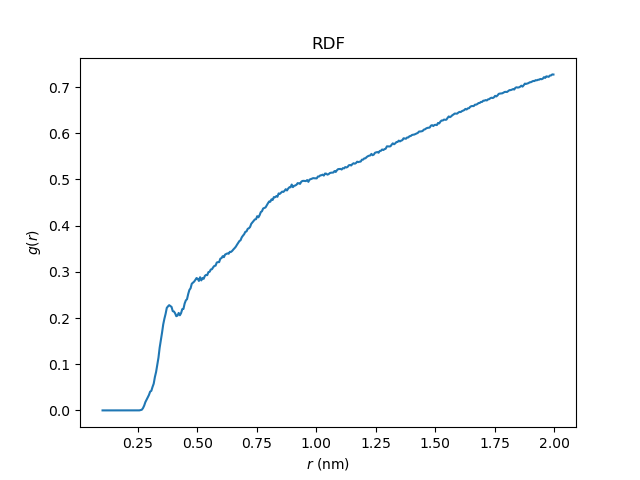

In [6]:
file_id1 = matches[0]
path1 = registry.get_mapped_path(file_id1)
assert os.path.exists(path1), "Path does not exist"
Image(filename=path1)

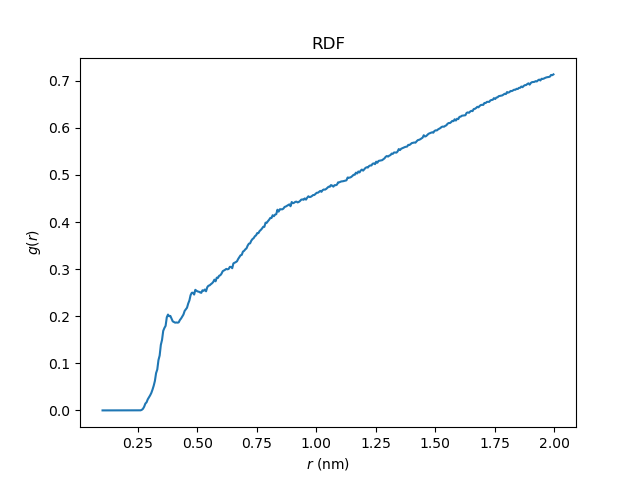

In [7]:
file_id2 = matches[1]
path2 = registry.get_mapped_path(file_id2)
assert os.path.exists(path2), "Path does not exist"
Image(filename=path2)